## EDA on Toxic Comment Classification dataset

In [3]:
import pandas as pd

df = pd.read_csv("data/train.csv")
print("Shape:", df.shape)
df.head()

Shape: (159571, 8)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [5]:
df.isnull().sum()


id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [ ]:
# distribution of toxic labels
label_cols = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

df[label_cols].sum()


toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

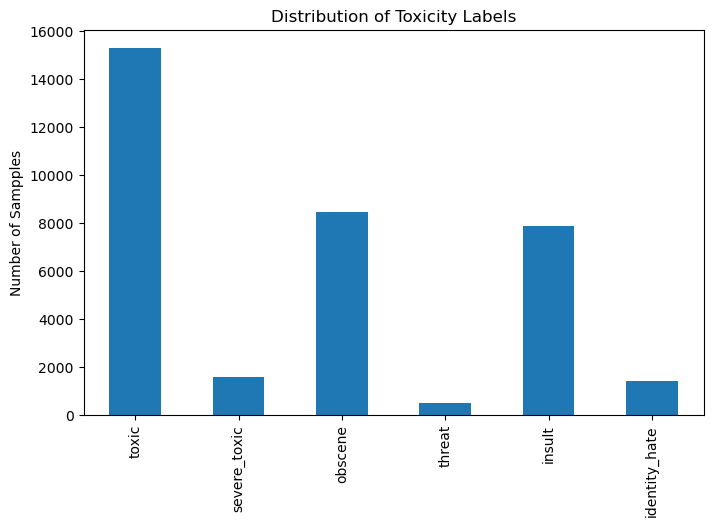

In [7]:
import matplotlib.pyplot as plt

df[label_cols].sum().plot(kind="bar", figsize=(8,5))
plt.title("Distribution of Toxicity Labels")
plt.ylabel("Number of Sampples")
plt.show()

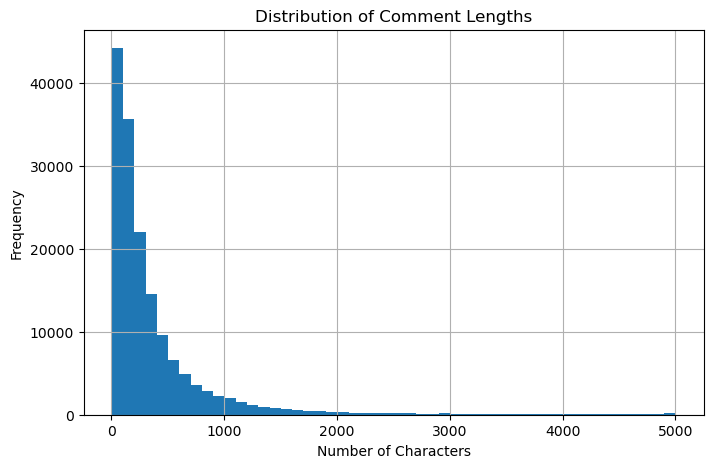

count    159571.000000
mean        394.073221
std         590.720282
min           6.000000
25%          96.000000
50%         205.000000
75%         435.000000
max        5000.000000
Name: comment_length, dtype: float64

In [11]:
#analyze comment length
df["comment_length"] = df["comment_text"].apply(len)

df["comment_length"].hist(bins=50, figsize=(8,5))
plt.title("Distribution of Comment Lengths")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.show()
df["comment_length"].describe()



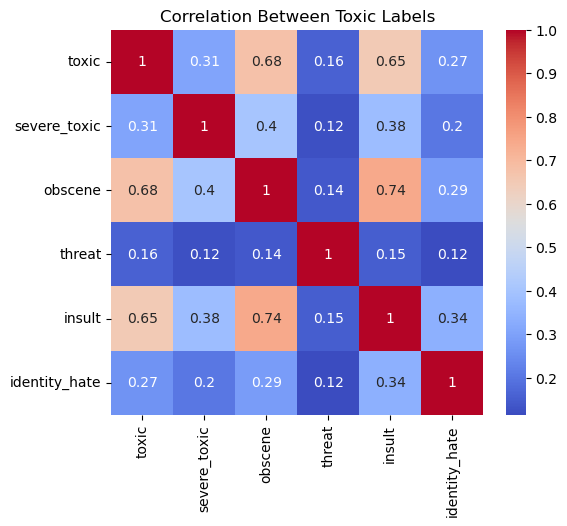

In [12]:
# correlation between labels
import seaborn as sns

corr = df[label_cols].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Between Toxic Labels")
plt.show()

# PCA

In [14]:
# convert text to numbers(TF_IDF)
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_features=5000,
    stop_words="english"
)

X = vectorizer.fit_transform(df["comment_text"])
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3228494 stored elements and shape (159571, 5000)>

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100, random_state=42)
X_pca = pca.fit_transform(X.toarray())
X_pca

array([[ 0.05298315, -0.03557613,  0.06714762, ..., -0.01204086,
         0.00969593, -0.01339351],
       [ 0.0019132 , -0.01680767,  0.11788737, ..., -0.00560934,
         0.0027172 , -0.01555848],
       [ 0.08066332, -0.01736856,  0.07102469, ...,  0.01437794,
         0.05063697, -0.00520993],
       ...,
       [-0.03858609, -0.0295998 , -0.04009423, ..., -0.0004527 ,
        -0.00239303, -0.00689326],
       [ 0.01548061, -0.08370921, -0.08715565, ...,  0.01868056,
         0.03654366,  0.00658353],
       [-0.06653125,  0.00449621, -0.00446732, ...,  0.02000785,
         0.01131887, -0.02207715]], shape=(159571, 100))

In [16]:
# check how much information pca kept
import numpy as np
explained_variance = np.cumsum(pca.explained_variance_ratio_)

print(explained_variance[:10])
print("Variance with 100 components:", explained_variance[-1])

[0.00773231 0.01402125 0.01955935 0.02421943 0.02838227 0.03217276
 0.03585046 0.03927978 0.04261192 0.04584007]
Variance with 100 components: 0.1837180899007107


# PCA was applied on TF-IDF features to reduce dimensionality. However, it was observed that the first 100 principal components preserved only 18.4% of the total variance, indicating significant information loss. This shows that textual TF-IDF features require a large number of components to retain meaningful variance. Therefore, either a larger number of components was selected or PCA was not used in the final model.

# 